In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
import visualkeras
from sklearn.preprocessing import normalize

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Verimiz hali hazırda test ve train olarak kendi içinde ayrıştırıldığı için ekstra bir işlem gerçekkeştirmeden direkt. "test" ve "train olarak ayırabildik.

In [54]:
image_index = 0
image_shape = x_train[image_index].shape
pixel_count = np.prod(image_shape)
print(f"Görüntünün piksel sayısı {image_index}: {pixel_count}")

Görüntünün piksel sayısı 0: 784


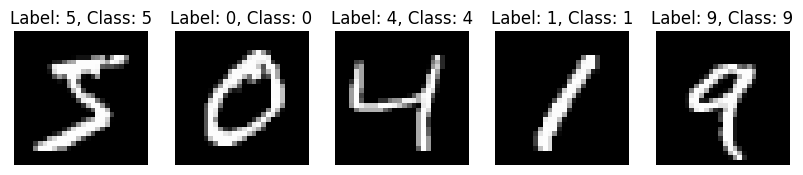

In [55]:
classes = [str(i) for i in range(10)]
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    class_label = classes[y_train[i]]  
    axes[i].set_title(f"Label: {y_train[i]}, Class: {class_label}")
    axes[i].axis('off')

plt.show()

Görüntünün pixel sayısı elde ettiğimizde nxn değerinin kaç olduğunu belirlemiş olduk bu durumda çalıştığımız görseller 28x28 olarak hesaplanmıştır.Buna göre Flatten değeri hesaplanıcaktır.Modelimize geçebiliriz.

In [56]:
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))


x_train_normalized = normalize(x_train_flat, norm='l2')
x_test_normalized = normalize(x_test_flat, norm='l2')
x_train_normalized = x_train_normalized.reshape((x_train.shape[0], 28, 28, 1))
x_test_normalized = x_test_normalized.reshape((x_test.shape[0], 28, 28, 1))


y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Görselleri sinir ağını eğitmeye uygun hale getirmek üzere ön işlemde bulunduk.

### Model1

In [57]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_normalized, y_train_categorical, 
                    epochs=10, batch_size=64, validation_data=(x_test_normalized, y_test_categorical))

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_normalized, y_train_categorical, epochs=10, 
                    batch_size=64, validation_data=(x_test_normalized, y_test_categorical))

Epoch 1/10
938/938 [==============================] - 11s 12ms/step - loss: 0.6084 - accuracy: 0.8545 - val_loss: 0.3134 - val_accuracy: 0.9122
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3066 - accuracy: 0.9133 - val_loss: 0.2810 - val_accuracy: 0.9198
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2841 - accuracy: 0.9196 - val_loss: 0.2708 - val_accuracy: 0.9219
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2731 - accuracy: 0.9226 - val_loss: 0.2650 - val_accuracy: 0.9230
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2669 - accuracy: 0.9248 - val_loss: 0.2607 - val_accuracy: 0.9251
Epoch 6/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2622 - accuracy: 0.9268 - val_loss: 0.2636 - val_accuracy: 0.9256
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2588 - accuracy: 0.9274 - val_loss: 0.2631 - val_accuracy:

In [136]:
best_accuracy = max(history.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Training Accuracy: 0.9297166466712952
Best Validation Accuracy: 0.9262999892234802


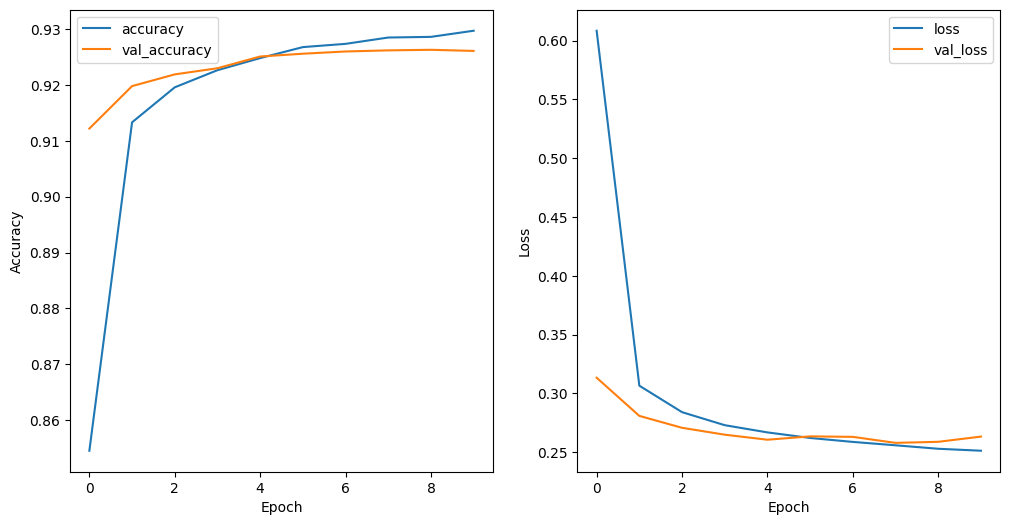

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Yapılan model sonucunda. accuracy, val_accuracy değerlerimiz birbirine çok yakın çıkmıştır.Bu loss değerlerimiz içinde geçerlidir.

In [60]:
y_pred_categorical = model.predict(x_test_normalized)
y_pred = np.argmax(y_pred_categorical, axis=1)

y_test_single = np.argmax(y_test_categorical, axis=1)

class_report = classification_report(y_test_single, y_pred)
print(class_report)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.88      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.92      0.86      0.89       892
           6       0.93      0.96      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.85      0.92      0.89       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



f1-score'una göre %93 lük bir accuracy değeri elde etmişizdir. Buda iyi bir sonuçtur şimdide confusion matrix inceleyelim ve elde edilen tahminlere daha yakından inceleyebilelim.

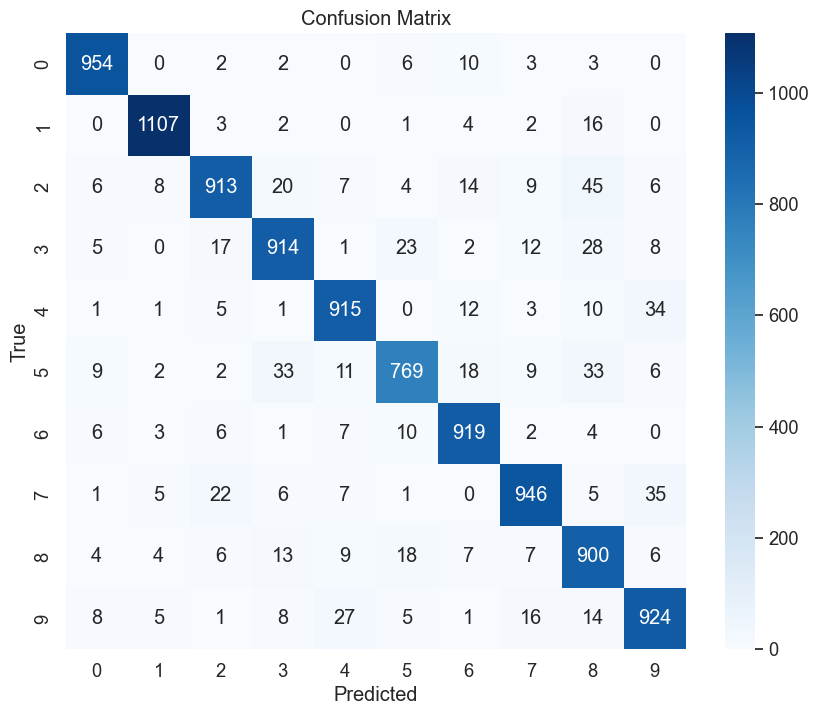

In [61]:
Y_pred_classes = np.argmax(y_pred_categorical, axis=1)
Y_true = np.argmax(y_test_categorical, axis=1)


cm = confusion_matrix(Y_true, Y_pred_classes)
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Model çoğu sınıfta güçlü bir performans sergilemekte, yüksek diyagonal değerler doğru tahminlere işaret etmekte, ancak özellikle rakam 5 için bazı yanlış sınıflandırmalar gözlemlenmektedir. Model iyi çalışmaktadır 5 sonucuda ortalamaya göre düşük kalmıştır ama tahmi açısından iyidir.

### Model2

Şimdi yeni modelimize yeni bir hidden Layer ekleyelim.

In [131]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28, 1)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(10, activation='softmax'))

In [132]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train_normalized, y_train_categorical,
                      epochs=10, batch_size=256, validation_data=(x_test_normalized, y_test_categorical))

Epoch 1/10
235/235 [==============================] - 6s 25ms/step - loss: 0.8537 - accuracy: 0.7965 - val_loss: 0.3532 - val_accuracy: 0.9011
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.3300 - accuracy: 0.9068 - val_loss: 0.2911 - val_accuracy: 0.9164
Epoch 3/10
235/235 [==============================] - 5s 23ms/step - loss: 0.2962 - accuracy: 0.9170 - val_loss: 0.2770 - val_accuracy: 0.9220
Epoch 4/10
235/235 [==============================] - 6s 24ms/step - loss: 0.2835 - accuracy: 0.9209 - val_loss: 0.2754 - val_accuracy: 0.9224
Epoch 5/10
235/235 [==============================] - 5s 23ms/step - loss: 0.2766 - accuracy: 0.9228 - val_loss: 0.2721 - val_accuracy: 0.9234
Epoch 6/10
235/235 [==============================] - 5s 23ms/step - loss: 0.2717 - accuracy: 0.9243 - val_loss: 0.2704 - val_accuracy: 0.9230
Epoch 7/10
235/235 [==============================] - 5s 23ms/step - loss: 0.2708 - accuracy: 0.9241 - val_loss: 0.2750 - val_accuracy: 0.9220

In [137]:
best_accuracy = max(history2.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_val_accuracy = max(history2.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Training Accuracy: 0.9243999719619751
Best Validation Accuracy: 0.9239000082015991


Modelimizin accuracy değerlerini incelendiğinde çok az bir farkla train accuracry , validation accurayden yüksek çıkmıştır. Fark çok büyük olsaydı overfitten şüphelenilebilirdi fakat birbirine oldukça yakın çıktıkları için sorun teşkil etmemektedir.

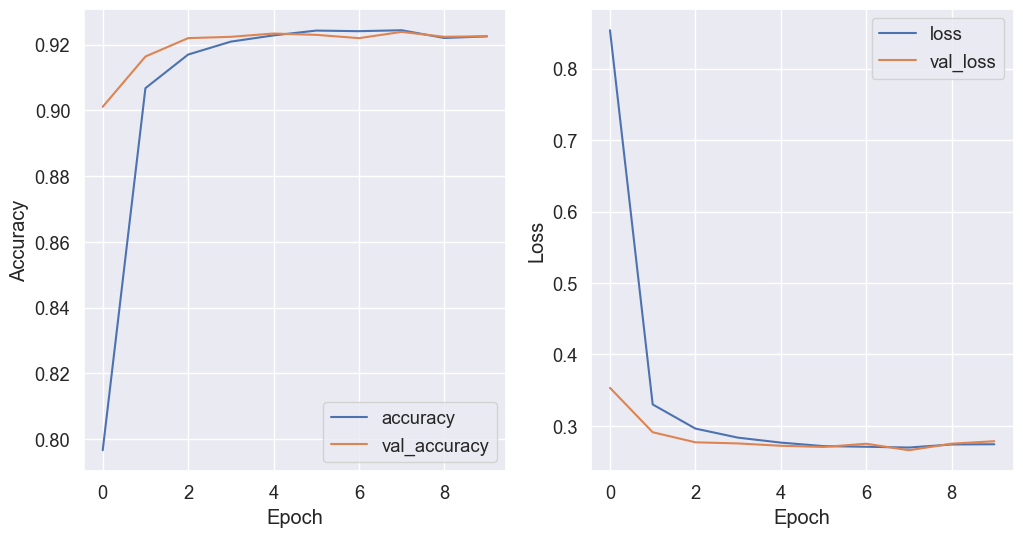

In [133]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Bir önceki modelimize göre değerlerimiz birbirine daha da yaklaşmıştır.6.epoch'tan sonra nerdeyse iç içelerdir.

In [138]:
y_pred_categorical = model2.predict(x_test_normalized)
y_pred = np.argmax(y_pred_categorical, axis=1)

y_test_single = np.argmax(y_test_categorical, axis=1)

class_report = classification_report(y_test_single, y_pred)
print(class_report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.95      0.96      1135
           2       0.91      0.89      0.90      1032
           3       0.93      0.90      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.92      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.82      0.93      0.87       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Accuracy score'umuz 1 öncekiyle aynı sonuç vermiş olsada. Değerlerimiz grafiktte de görüldüğü gibi birbirne daha yaklaştığı için daha iyi bir modeldir.Tekrardan confusion matrix incelemesinde bulunalım

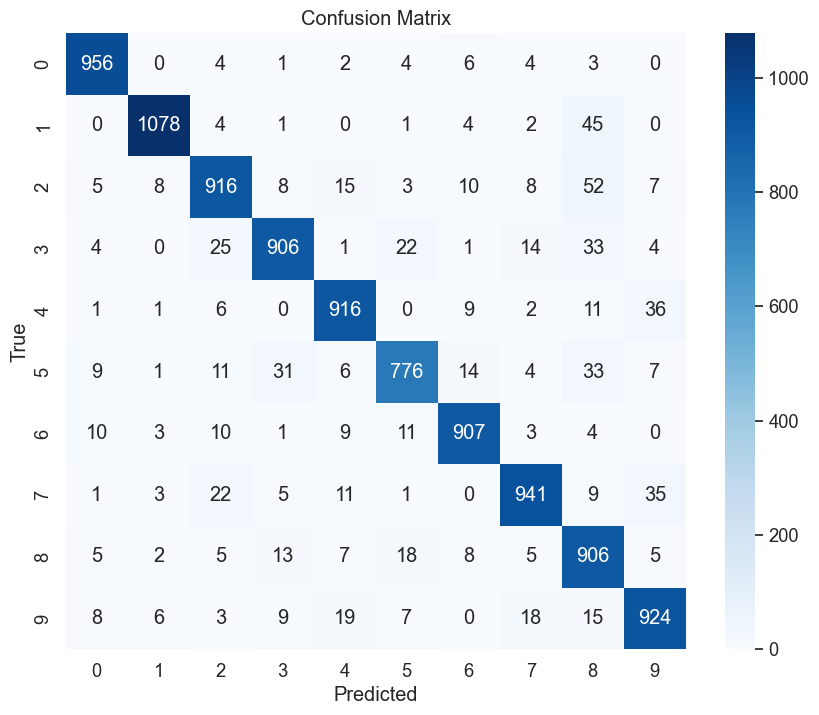

In [135]:
Y_pred_classes = np.argmax(y_pred_categorical, axis=1)
Y_true = np.argmax(y_test_categorical, axis=1)

cm = confusion_matrix(Y_true, Y_pred_classes)
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Tahmin değerleri birbirine yaklaşmıştır. Örneğin "5" sayısının tahmini artmış fakat "2"nin tahmininde biraz azalma gözlemlenmiştir.

### Model3

In [115]:
model3 = Sequential()

model3.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),
                  kernel_initializer='he_normal',strides=1,padding='same'))

model3.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, kernel_size=(3,3),activation='relu',strides=1,padding='same'))
model3.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model3.add(Dropout(0.40))
model3.add(Conv2D(128,kernel_size=(3,3),activation='relu',strides=1,padding='same'))
model3.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model3.add(Dropout(0.5))


model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 7, 7, 64)        

In [116]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3= model3.fit(x_train_normalized, y_train_categorical, epochs=10,
                     batch_size=32, validation_data=(x_test_normalized, y_test_categorical))

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2068 - accuracy: 0.9336 - val_loss: 0.0468 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.0404 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0686 - accuracy: 0.9801 - val_loss: 0.0396 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0696 - accuracy: 0.9797 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0744 - accuracy: 0.9810 - val_loss: 0.0340 - val_accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0951 - accuracy: 0.9814 - val_loss: 0.0591 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1515 - accuracy: 0.9790 - val_loss: 0.0764 -

In [139]:
best_accuracy = max(history3.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_val_accuracy = max(history3.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Training Accuracy: 0.9814333319664001
Best Validation Accuracy: 0.9908000230789185


Train ettiğimiz veride %98 e yakın doğru sonuç vermiştir Validation accuracry değerimizde %99 ile train ettiğimizden daha iyi bir sonuç vermiştir.Bu da demektirki modelimiz ezber yapmamış(overfitting) öğrenmiştir.

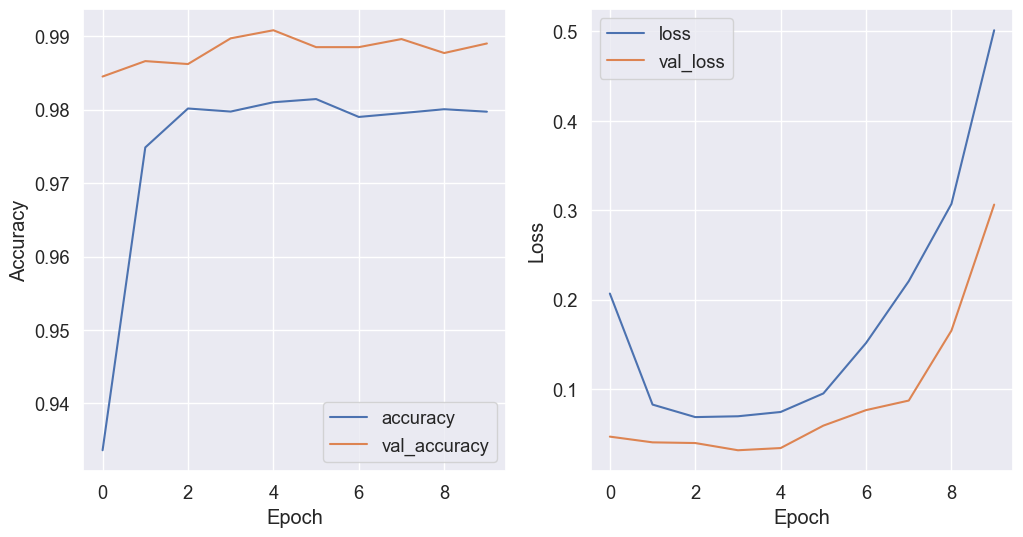

In [140]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Accuracy değerleri için aradaki mesafe açılmış gibi gözlemlenmektedir. Fakata genel Accuracy değerimiz artmış ve verideki kırılma ilişkileri birbiri ile doğru orantılıdır. 

In [142]:
y_pred_categorical = model3.predict(x_test_normalized)
y_pred = np.argmax(y_pred_categorical, axis=1)

y_test_single = np.argmax(y_test_categorical, axis=1)

class_report = classification_report(y_test_single, y_pred)
print(class_report)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Accuracy değerimiz %99 luk bir başarı sergilemektedir. Modelimiz çok iyi bir sonuç verdiğinin göstergesidir. Son olarakta Confusion matrix değerleri incelenip değerlerimizin kaçını doğru tahmin ettiğini gözlemleyelim.

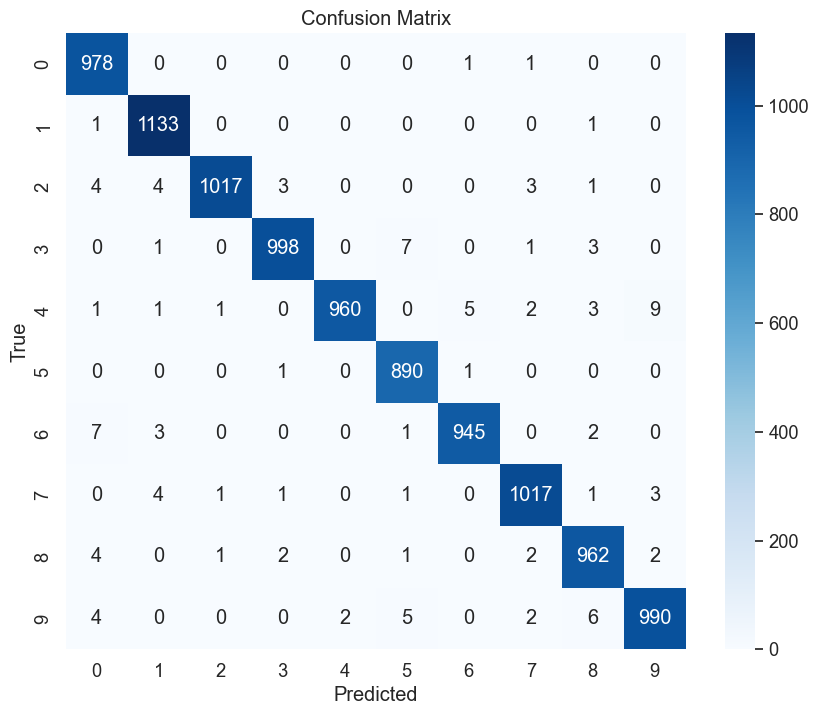

In [119]:
Y_pred_classes = np.argmax(y_pred_categorical, axis=1)
Y_true = np.argmax(y_test_categorical, axis=1)

cm = confusion_matrix(Y_true, Y_pred_classes)
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Diğer modeller incelendiğinde en düşük tahmin edilen değerini "5" olduğunu gözlemlemiştik. Buradada aynı şekildedir fakat tahmin değerleri artmıştır. Bir tek 5 değeri için değil bütün değerlerimizde artıl gözlemlenmiştir.